In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import LinearSegmentedColormap
data = pd.read_csv("../WineAnalysis/WineQT.csv")

# Dela datan i ett testset och ett träningsset

In [142]:
data_x = data.iloc[:, :11]
data_y = data["quality"]
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

# Träna modellen med träningsdatasetet

In [143]:
rforest = RandomForestClassifier()
rforest.fit(x_train, y_train)
plt.show() # Plotta inget här

# Vad får vi för test score?

In [144]:
y_pred = rforest.predict(x_test)
test_score = accuracy_score(y_test, y_pred)
print(f'test_score = {test_score:.2f}')

test_score = 0.74


# Hur många träd använde vi?

In [145]:
print(len(rforest.estimators_))

100


# Attributens vikt
Vilka har störst påverkan?

In [146]:
feature_importances = rforest.feature_importances_
feature_names = x_train.columns
for name, value in zip(feature_names, feature_importances):
    print(f"{name}: {value:.2f}")

fixed acidity: 0.07
volatile acidity: 0.10
citric acid: 0.08
residual sugar: 0.07
chlorides: 0.08
free sulfur dioxide: 0.07
total sulfur dioxide: 0.09
density: 0.09
pH: 0.08
sulphates: 0.12
alcohol: 0.15


# Confusion matrix

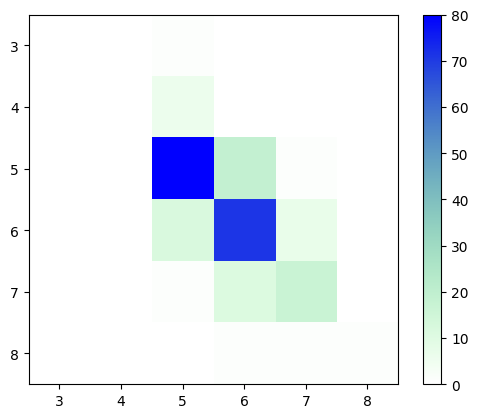

In [206]:
cm = confusion_matrix(y_test, y_pred)
colors = [(0, (0,1,0,0)), (1, (0,0,1,1))]
cmap = LinearSegmentedColormap.from_list('custom_colormap', colors)
plt.imshow(cm, cmap=cmap)
plt.xticks(np.arange(0, cm.shape[1]), np.arange(3, 9))
plt.yticks(np.arange(0, cm.shape[0]), np.arange(3, 9))
plt.colorbar()
plt.show()

Enligt våran confusion matrix så är det oftast klasserna 5 och 6 som försutsägs rätt. Gissningsvis är det på grund av att datan mest innehåller viner med en kvalitet på just 5 eller 6, därför är modellen bäst tränad på att förutspå just dom två klasserna.